In [1]:
import numpy as np
import cptac
import cnvutils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CHROMOSOME = '8'
ARM = 'p'
TRANS_OR_CIS = 'cis'

In [3]:
ttest_results_file = f"{CHROMOSOME}{ARM}_{TRANS_OR_CIS}effects_ttest.tsv"

ttest_results = pd.\
read_csv(ttest_results_file, sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")

In [4]:
id_cols = [col for col in ttest_results.columns if not 'Database_ID' in col]
ttest_results = ttest_results[id_cols]
pvalue_cols = [col for col in ttest_results.columns if 'pvalue' in col]
ttest_results = ttest_results[pvalue_cols]

In [5]:
def get_cancer(val):
    val_list = val.split('_')
    return val_list[0].upper()

In [6]:
ttest_results_long = ttest_results.reset_index().melt(id_vars='protein', var_name='cancer').sort_values('protein')
ttest_results_long['cancer'] = ttest_results_long.cancer.apply(get_cancer)
ttest_results_long

,protein,cancer,value
0,ADAMDEC1,BRCA,6.978531e-01
198,ADAMDEC1,HNSCC,7.380721e-01
495,ADAMDEC1,OVARIAN,7.404988e-01
396,ADAMDEC1,LUAD,1.466949e-01
99,ADAMDEC1,COLON,1.266649e-01
297,ADAMDEC1,LSCC,8.748058e-01
199,AGPAT5,HNSCC,9.045393e-04
496,AGPAT5,OVARIAN,1.035601e-02
100,AGPAT5,COLON,2.549562e-03
298,AGPAT5,LSCC,9.115925e-03


In [7]:
ttest_results_long[ttest_results_long["protein"] == "FGFR1"]

,protein,cancer,value


In [8]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

In [9]:
results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

In [10]:
results = results.sort_values(['start_bp', 'cancer'])

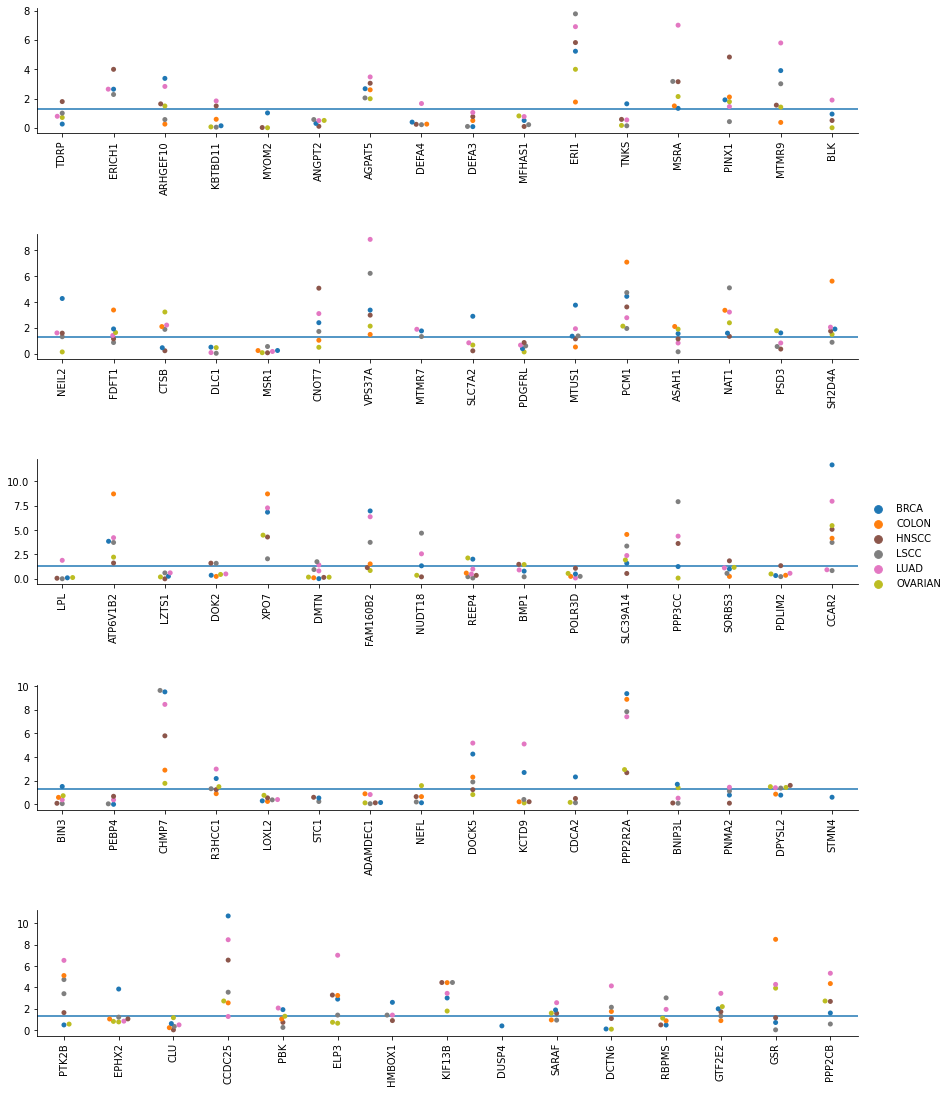

In [11]:
cnvutils.make_pvalue_plot(
    results,
    label_column='index', 
    value_column='value', 
    group_column='cancer', 
    labels_per_plot=16)
# plt.legend()

In [12]:
results

,index,cancer,value,chromosome,start_bp,end_bp,arm
1668,TDRP,BRCA,0.556640,8,489792.0,545781.0,p
1669,TDRP,BRCA,0.556640,8,489792.0,545781.0,p
1670,TDRP,BRCA,0.556640,8,489792.0,545781.0,p
1671,TDRP,COLON,NaN,8,489792.0,545781.0,p
1672,TDRP,COLON,NaN,8,489792.0,545781.0,p
1673,TDRP,COLON,NaN,8,489792.0,545781.0,p
1674,TDRP,HNSCC,0.016206,8,489792.0,545781.0,p
1675,TDRP,HNSCC,0.016206,8,489792.0,545781.0,p
1676,TDRP,HNSCC,0.016206,8,489792.0,545781.0,p
1677,TDRP,LSCC,0.099855,8,489792.0,545781.0,p
